<a href="https://colab.research.google.com/github/Charlee0616/Data-Mining/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
penguins = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")

# **1. k-Nearest Neighbors Classifier**

In [48]:
penguins.dropna(inplace=True)

In [49]:
X = penguins.drop("species" , axis = 1) #Features
y = penguins["species"] #target

In [50]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols), #numerical
        ('cat', OneHotEncoder(), categorical_cols) # encode categorical
    ])

In [52]:
X_transformed = preprocessor.fit_transform(X)

In [53]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42)

In [98]:
def KNearest_Neighbors_Classifier(X_train, X_test, y_train, y_test, n_neighbors):
  def euclidean(x1, x2): # finding the euclidean distance between data points
    return np.sqrt(np.sum((x1 - x2)**2))
  #finding the closest neighbors
  def find_neighbors(X_train, x, y_train, n_neighbors):
    distances = [euclidean(x, x_train) for x_train in X_train]
    k_nearest = np.argsort(distances)[:n_neighbors]
    k_nearest_label = [y_train[i] for i in k_nearest]
    most_common = Counter(k_nearest_label).most_common(1)[0][0]
    return most_common
  # predict the class of the data point based on the neighboring points
  def predict(X_test, X_train, y_train, n_neighbors):
    predictions = [find_neighbors(X_train, x, y_train, n_neighbors) for x in X_test]
    return predictions
  # results and comparison to sklearn
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train, y_train)
  sklearn_preds = knn.predict(X_test)
  preds = predict(X_test, X_train, y_train, n_neighbors=5)

  print(f"My Implementation: {accuracy_score(y_test, preds)}\nScikit-Learn Implementation: {accuracy_score(y_test, sklearn_preds)}")
  return preds

In [99]:
results = preds #KNearest_Neighbors_Classifier(X_train, X_test, y_train, y_test, n_neighbors=5)
print(results)
comparison = KNearest_Neighbors_Classifier(X_train, X_test, y_train, y_test, n_neighbors=5)

[1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0]
My Implementation: 0.7313432835820896
Scikit-Learn Implementation: 0.746268656716418


# **2. (a) logistic regression**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [13]:
list(penguins)

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

In [14]:
penguins.dropna(inplace=True)

In [15]:
penguins["species"] = penguins["species"].astype("category").cat.codes

In [16]:
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = penguins["species"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [19]:
y_pred = log_reg.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



In [21]:
def plot_decision_boundaries(X, y, model, title):
  x_min, x_max = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
  y_min, y_max = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
  scatter=plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap="viridis")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.colorbar(scatter)
  plt.show()

In [22]:
X_subset = X[["bill_length_mm", "bill_depth_mm"]]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


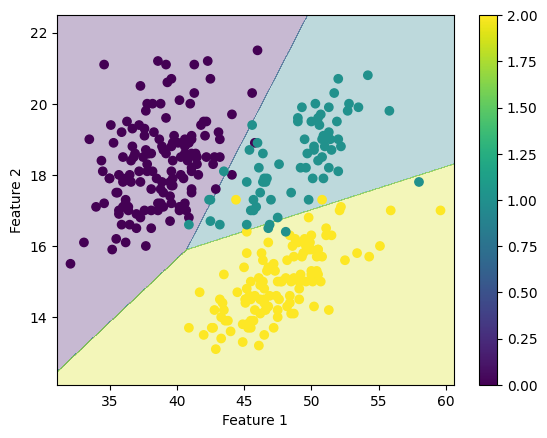

In [23]:
log_reg = LogisticRegression(multi_class= "multinomial", solver = "lbfgs", max_iter=200)
log_reg.fit(X_subset, y)
plot_decision_boundaries(X_subset, y, log_reg, "Logistic Regression Decision Boundary")

# **2. (b) Support Vector Machine**

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [25]:
svm_clf = SVC(kernel = "linear")
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = svm_clf.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


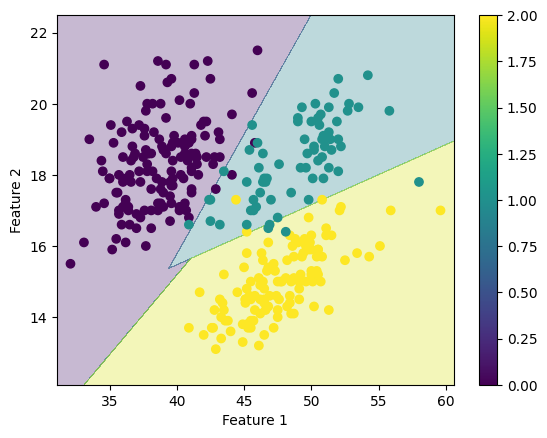

In [28]:
svm_clf = SVC(kernel = "linear")
svm_clf.fit(X_subset, y)
plot_decision_boundaries(X_subset, y, svm_clf, "SVM Decision Boundary")

# **3. (a) Softmax Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [30]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [31]:
y_pred = softmax_reg.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


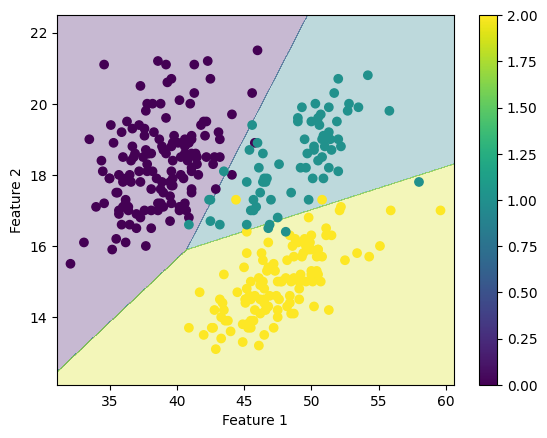

In [33]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
softmax_reg.fit(X_subset, y)
plot_decision_boundaries(X_subset, y, softmax_reg, "Softmax Regression Decision Boundary")

# **3. (b) Stochastic Gradient Descent Classifier**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
penguins.dropna(inplace=True)

In [36]:
penguins["species"] = penguins["species"].astype("category").cat.codes

In [37]:
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = penguins["species"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
sgd_clf = SGDClassifier(max_iter=100, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=100)

In [40]:
y_pred = sgd_clf.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.26865671641791045
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.27      1.00      0.42        18
           2       0.00      0.00      0.00        18

    accuracy                           0.27        67
   macro avg       0.09      0.33      0.14        67
weighted avg       0.07      0.27      0.11        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
